In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
path="/lustre/ytzheng/"
# path = "C:/data/SAM_cases/"

Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' +  '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

f = f.isel(time = 30)
f1 = f1.isel(time = 30)

In [3]:
Lv     = 2.5104e6          # Latent heat of condensation, J/kg
myfontsize = 12
z = f['z']/f['ZINV']/1000.
z1 = f1['z']/f1['ZINV']/1000.

In [4]:
def setax(ax, zcb, ytitle = '', xtitle = '', color = 'black'):
    ax.axhline(y=zcb, linestyle='--',color = color)  
    ax.set_ylabel(ytitle, fontsize=myfontsize) 
    ax.set_xlabel(xtitle, fontsize=myfontsize) 
    ax.set_ylim([0., 1.0])
    ax.grid(True)

In [5]:
f

<xarray.Dataset>
Dimensions:               (z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
    time                  float32 166.27083
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   float32 dask.array<chunksize=(), meta=np.ndarray>
    Ps                    float32 dask.array<chunksize=(), meta=np.ndarray>
    CLDSHD                float32 dask.array<chunksize=(), meta=np.ndarray>
    AREAPREC              float32 dask.array<chunksize=(), meta=np.ndarray>
    CLD245                float32 dask.array<chunksize=(), meta=np.ndarray>
    WMAX                  float32 dask.array<chunksize=(), meta=np.ndarray>
    UMAX                  float32 dask.array<chunksize=(), meta=np.ndarray>
    PREC                  float32 dask.array<chunksize=(), meta=np.ndarray>
    LHF                   float32 dask.array<chunksize=(), meta=np.ndarray>
    SHF                   flo

(-0.1, 0.1)

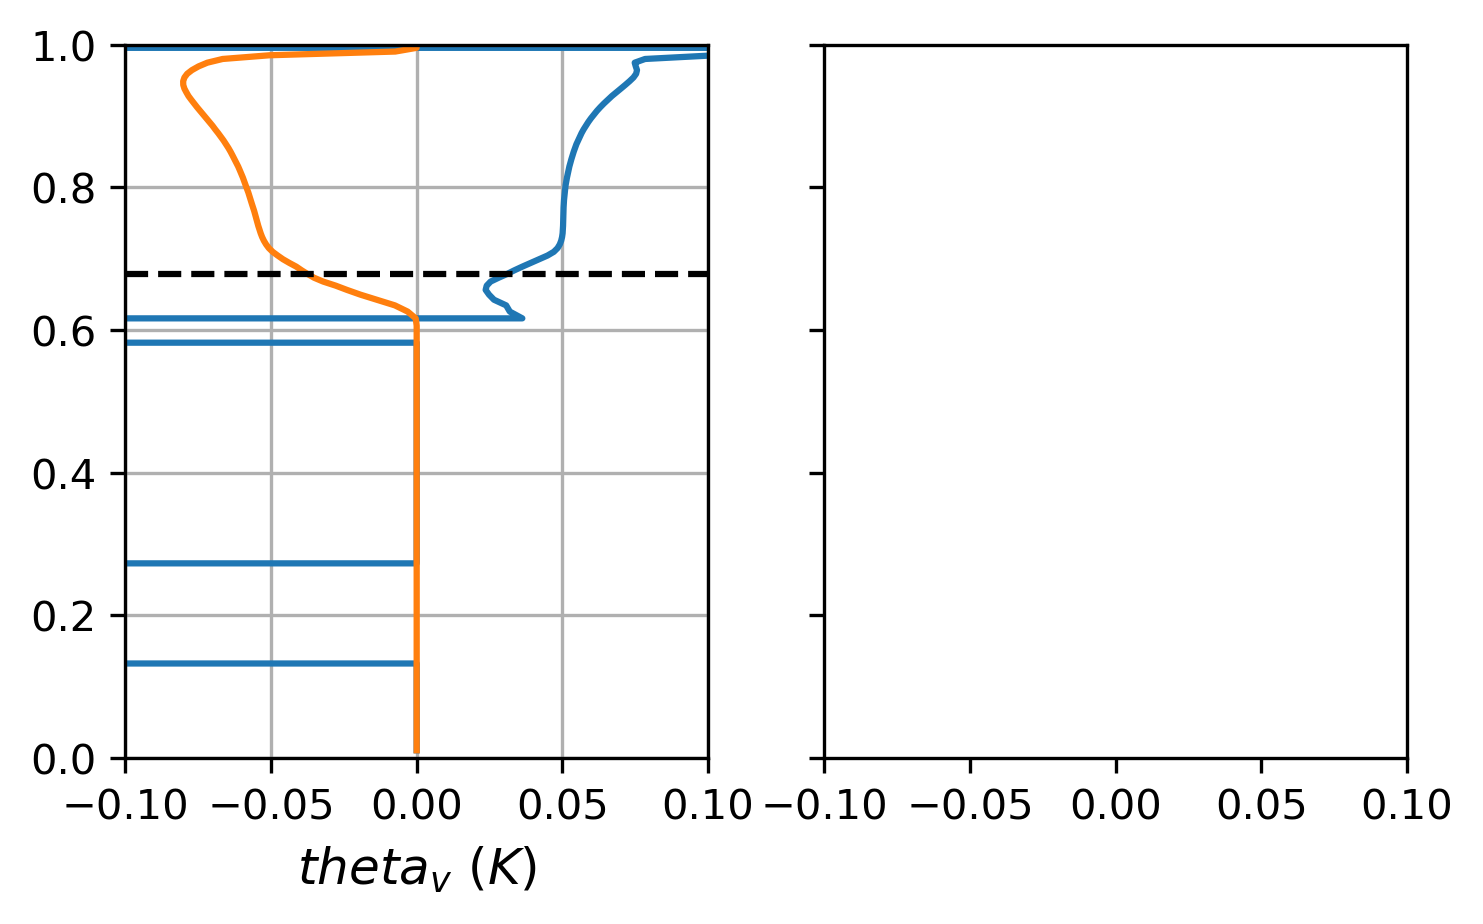

In [22]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)
#
# axs[0].plot(f1.TVCOR - (0.5*f1.TVCOR + 0.5*f1.TVCDN), z1, label = 'UP')
# axs[0].plot(f1.TVCDN - (0.5*f1.TVCOR + 0.5*f1.TVCDN), z1, label = 'DN')

axs[0].plot(f1.TVCOR - f1.TVCLD, z1, label = 'UP')
axs[0].plot(f1.TVCDN - f1.TVCLD, z1, label = 'DN')

setax(axs[0], f1["zcb"]/f1["ZINV"]/1000.,
      xtitle = r'$theta_v \ (K)$')

axs[0].set_xlim([-0.1, 0.1])

In [23]:
path="/lustre/ytzheng/"

f2 = xr.open_mfdataset('/lustre/ytzheng/result/model_codes/SAM6.11.3_UW/ASTEX_warm2.6_MICRO_THOM/*N100.nc',
                      combine = 'by_coords',decode_cf = False)

f2 = f2.isel(time = 30)

In [24]:
f2

<xarray.Dataset>
Dimensions:     (z: 512)
Coordinates:
  * z           (z) float32 10.5 22.5 37.5 52.5 ... 3939.8 4055.5 4182.2 4320.9
    time        float32 166.27083
Data variables:
    p           (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST         float32 dask.array<chunksize=(), meta=np.ndarray>
    Ps          float32 dask.array<chunksize=(), meta=np.ndarray>
    CLDSHD      float32 dask.array<chunksize=(), meta=np.ndarray>
    AREAPREC    float32 dask.array<chunksize=(), meta=np.ndarray>
    CLD245      float32 dask.array<chunksize=(), meta=np.ndarray>
    WMAX        float32 dask.array<chunksize=(), meta=np.ndarray>
    UMAX        float32 dask.array<chunksize=(), meta=np.ndarray>
    PREC        float32 dask.array<chunksize=(), meta=np.ndarray>
    LHF         float32 dask.array<chunksize=(), meta=np.ndarray>
    SHF         float32 dask.array<chunksize=(), meta=np.ndarray>
    PW          float32 dask.array<chunksize=(), meta=np.ndarray>
    PWOBS      

In [29]:
z2 = f2['z']/f2['ZINV']/1000.

(-0.1, 0.1)

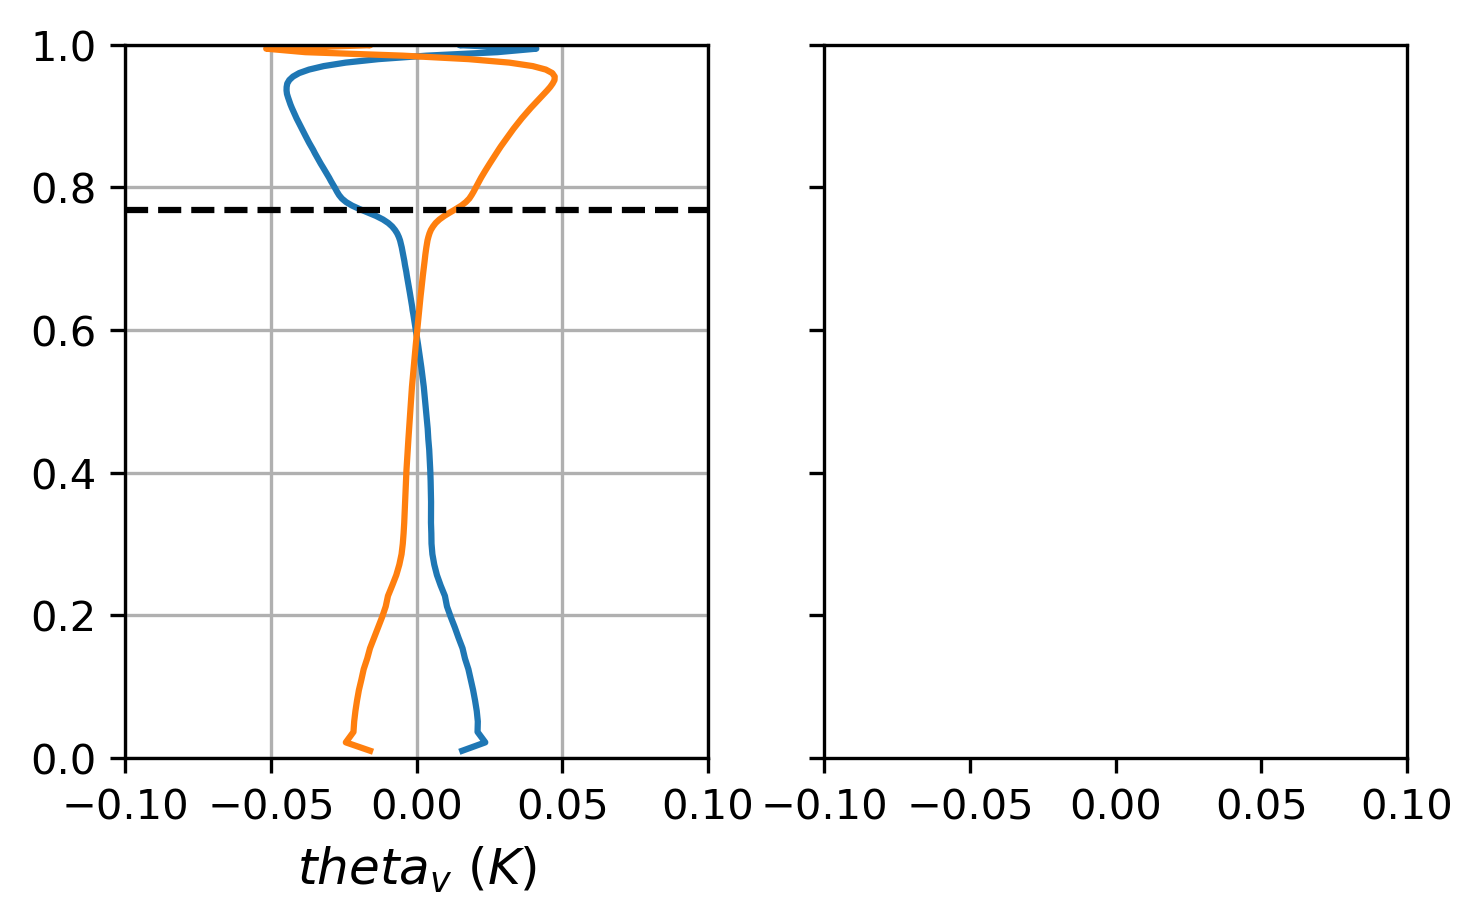

In [31]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

axs[0].plot(f2.TVDDN - (f2.DDN*f2.TVDDN + f2.DUP*f2.TVDUP), z2, label = 'UP')
axs[0].plot(f2.TVDUP - (f2.DDN*f2.TVDDN + f2.DUP*f2.TVDUP), z2, label = 'DN')

setax(axs[0], f2["ZCB"]/f2["ZINV"],
      xtitle = r'$theta_v \ (K)$')

axs[0].set_xlim([-0.1, 0.1])